<h1>Tryout 1</h1>

In [25]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.models import load_model

print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.10.0


In [2]:
from keras.utils import load_img, img_to_array

In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = load_img(img_path, target_size=(112, 112))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [4]:
my_mod = load_model('spatial_compiled.h5',compile=False)

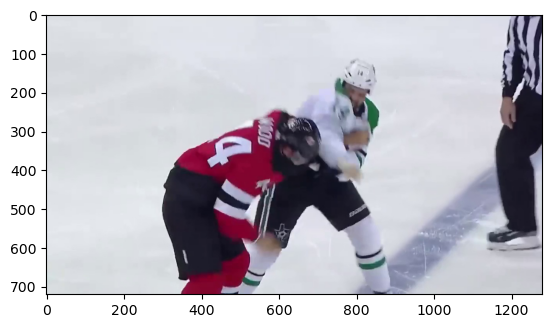

In [6]:
path = 'D:\\Thesis Works\\Datasets\\sample_frames\\V_320.mp4_f0.JPG'
img = load_img(path)
plt.imshow(img)

1/1 [==============================] - 0s 22ms/step
Violence
99.9981164932251


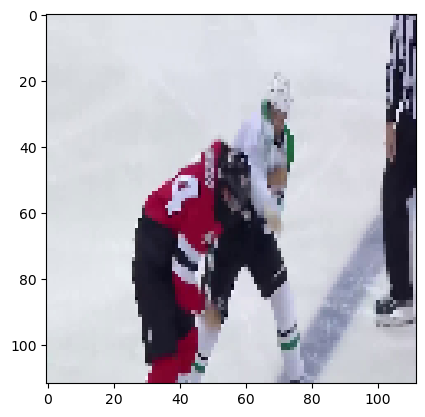

In [8]:
class_names = ['NonViolence', 'Violence']
class_names_label = {i:class_name for i, class_name in enumerate(class_names)}

path = 'D:\\Thesis Works\\Datasets\\sample_frames\\V_320.mp4_f0.JPG'
images = transform_img_fn([os.path.join(path)])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = my_mod.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)

# print(prediction)

for i,j in class_names_label.items():
    if i == prediction:
        print(j)
        break

print(f"{pct*100}")

In [9]:
import lime
from lime import lime_image
from lime import submodular_pick

F:\Anaconda\envs\tf_gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
from skimage.segmentation import mark_boundaries

In [11]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
# explanation = explainer.explain_instance(images[0].astype('double'), my_mod.predict,labels=(0, ), top_labels=20, hide_color=3, num_samples=500)

In [12]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), my_mod.predict,labels=(0, ), top_labels=15, hide_color=4, num_samples=500)

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 1s 635ms/step


  2%|▏         | 10/500 [00:00<00:33, 14.64it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 30/500 [00:00<00:10, 42.92it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 50/500 [00:00<00:06, 67.13it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 70/500 [00:01<00:04, 87.19it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 90/500 [00:01<00:03, 102.77it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 110/500 [00:01<00:03, 114.17it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 130/500 [00:01<00:03, 122.47it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 150/500 [00:01<00:02, 128.89it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 170/500 [00:01<00:02, 133.81it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 190/500 [00:01<00:02, 135.89it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 210/500 [00:02<00:02, 135.64it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 230/500 [00:02<00:01, 137.16it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 250/500 [00:02<00:01, 136.51it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 270/500 [00:02<00:01, 133.20it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 290/500 [00:02<00:01, 128.83it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 310/500 [00:02<00:01, 127.65it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 330/500 [00:03<00:01, 127.56it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 350/500 [00:03<00:01, 128.49it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 370/500 [00:03<00:01, 126.21it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 390/500 [00:03<00:00, 126.07it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 410/500 [00:03<00:00, 124.84it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 430/500 [00:03<00:00, 124.88it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 450/500 [00:03<00:00, 123.76it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 470/500 [00:04<00:00, 124.12it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 490/500 [00:04<00:00, 123.92it/s]

1/1 [==============================] - 0s 23ms/step


100%|██████████| 500/500 [00:04<00:00, 113.84it/s]


CPU times: total: 4.8 s
Wall time: 4.88 s


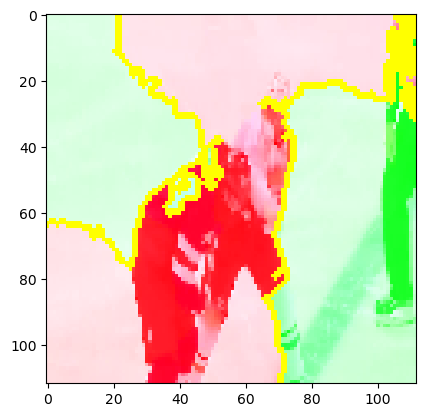

In [13]:
temp, mask = explanation.get_image_and_mask(0,positive_only=False,negative_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

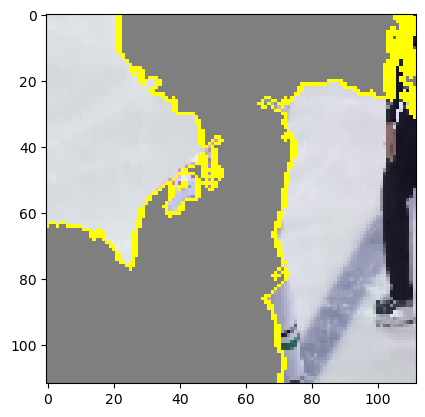

In [26]:
temp, mask = explanation.get_image_and_mask(0, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

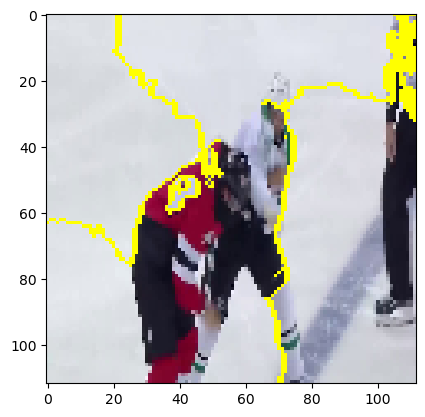

In [15]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

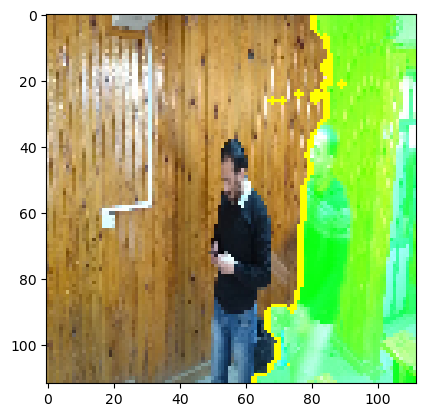

In [19]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

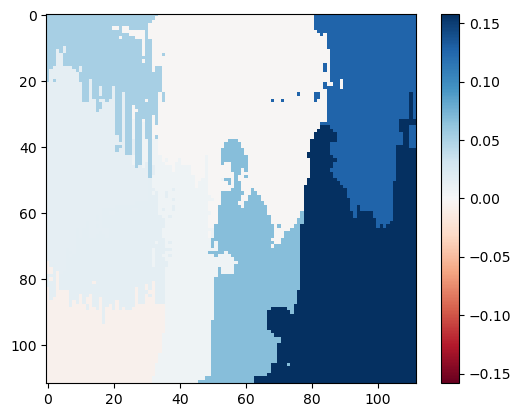

In [20]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

1/1 [==============================] - 0s 22ms/step
Violence
99.99998807907104


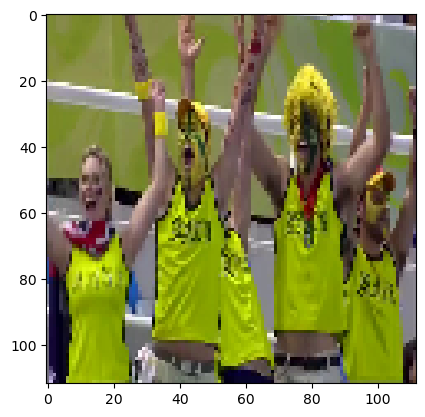

In [245]:
path = 'D:\\Thesis Works\\Datasets\\RLVD\\sample_frames\\NV_85.mp4_f2.JPG'
images = transform_img_fn([os.path.join(path)])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = my_mod.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)

# print(prediction)

for i,j in class_names_label.items():
    if i == prediction:
        print(j)
        break

print(f"{pct*100}")

In [246]:
explainer = lime_image.LimeImageExplainer()

In [279]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), my_mod.predict,labels=(1, ), top_labels=10, hide_color=None, num_samples=500)

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 10/500 [00:00<00:12, 39.37it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 30/500 [00:00<00:05, 84.69it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 50/500 [00:00<00:04, 108.31it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 70/500 [00:00<00:04, 101.48it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 90/500 [00:00<00:03, 111.52it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 110/500 [00:01<00:03, 121.31it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 130/500 [00:01<00:02, 127.46it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 150/500 [00:01<00:02, 132.62it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 170/500 [00:01<00:02, 136.56it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 190/500 [00:01<00:02, 138.76it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 210/500 [00:01<00:02, 141.51it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 230/500 [00:01<00:01, 141.61it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 250/500 [00:02<00:01, 142.91it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 270/500 [00:02<00:01, 140.77it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 290/500 [00:02<00:01, 136.72it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 310/500 [00:02<00:01, 133.77it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 330/500 [00:02<00:01, 128.72it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 350/500 [00:02<00:01, 127.58it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 370/500 [00:02<00:01, 126.79it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 390/500 [00:03<00:00, 125.06it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 410/500 [00:03<00:00, 122.07it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 430/500 [00:03<00:00, 121.37it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 450/500 [00:03<00:00, 121.10it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 470/500 [00:03<00:00, 120.69it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 490/500 [00:03<00:00, 121.07it/s]

1/1 [==============================] - 0s 23ms/step


100%|██████████| 500/500 [00:04<00:00, 123.95it/s]

CPU times: total: 4.64 s
Wall time: 4.19 s


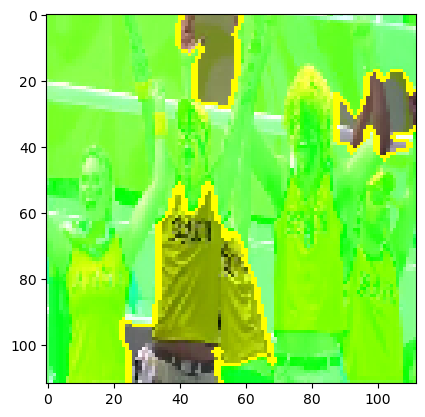

In [280]:
temp, mask = explanation.get_image_and_mask(1,positive_only=False,negative_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

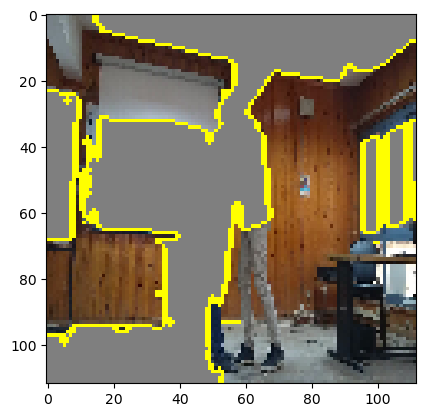

In [24]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

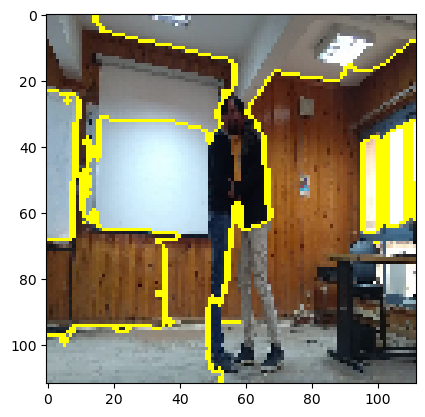

In [25]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

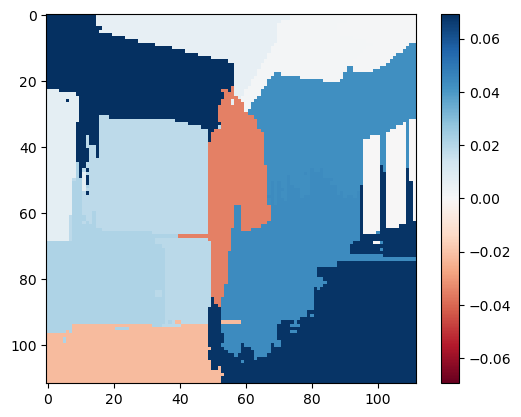

In [28]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# Tryout 2

In [32]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.models import load_model
from keras.utils import load_img, img_to_array

print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.10.0


In [33]:
model = load_model('spatial_compiled.h5',compile=False)

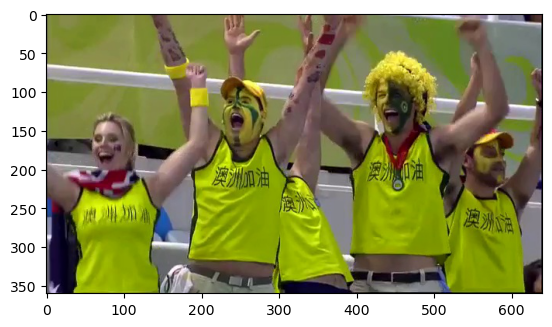

In [326]:
path = 'D:\\Thesis Works\\Datasets\\RLVD\\sample_frames\\NV_85.mp4_f2.JPG'
img = load_img(path)
plt.imshow(img)

In [40]:
IMG_SIZE = (112, 112)
def transform_image(image_path, size):
    out = []
    for img_path in image_path:
        img = load_img(image_path, target_size=size)
        img = img_to_array(img)# Transforming the image to get the shape as [channel, height, width]
        img = np.expand_dims(img, axis=0) # Adding dimension to convert array into a batch of size (1,299,299,3)
        img = img/255.0 # normalizing the image to keep within the range of 0.0 to 1.0
        out.append(img)
    return np.vstack(out)

normalized_img = transform_image(path, IMG_SIZE)

# out = []
#     for img_path in path_list:
#         img = load_img(img_path, target_size=(112, 112))
#         x = img_to_array(img)
#         x = np.expand_dims(x, axis=0)
#         x = inc_net.preprocess_input(x)
#         out.append(x)
#     return np.vstack(out)